# Predicting the Satisfaction Level of Airplane Passengers
## Phase 2: Statistical Modelling

#### Group Name: Group 26

#### Name(s) & ID(s) of Group Members:
* Lai Pak Yin (s3827212)
* Weixi Guan (s3830776)
#### 

## Table of Contents
* [Introduction](#intro)
    + [Phase 1 Summary](#p1sum)
    + [Report Overview](#overview)
    + [Overview of Methodology](#method)
* [Statistical Modelling](#sm)
    + [Model Overview](#overview2)
    + [Model Fitting](#fit)
* [Neural Network Model Fitting & Tuning](#Review)
* [Critique & Limitations](#cl)
* [Summary & Conclusions](#sc)
    + [Project Summary](#sum)
    + [Summary of Findings](#find)
    + [Conclusions](#con)

## Introduction <a id='intro'></a>

### Phase 1 Summary <a id='p1sum'></a>

In Phase 1, we completed the data cleaning & preprocessing and data visualisation tasks. We have dropped the variables that contain similar information in the csv file. For example, `inflight_wifi_service`, `inflight_entertainment`, `ease_of_online_booking` and `online_boarding` are dropped because they can be explained by other variable. 

For data visualisation tasks, we created some graph to explain variables in the dataset. By using the explanatory variables, we can concluded that the overall ratio of passenger felt neutral or dissatisfied are higher than satisfied. When comparing short and long distance flight, people keen on choose business class if they have a long flight distance and their satisfied ratio are highest compared with Eco class and Eco plus class. Therefore, passengers tend to feel neutral or not satisfied when they are travelling without business class in any distance. 

### Report Overview <a id='overview'></a>

For our Phase 2 assignment, we are going to perform statistical modelling with our csv file. We will start by introducing the methodology that we are going to use and an overview about our model. Then, we will start analysis our csv file by model fitting our data. We will also present 5 different fine-tuning plots for our Neural Network Model Fitting & Tuning and concluded a summary of our project to summarise our findings and the strengths and weaknesses of this project.

### Overview of Methodology <a id='method'></a>

For our Phase 2 Methodology, we start by cleaning the data inside the csv file, which is, we drop the rows with missing values and rename variables. Then, we establish our full model by perform one-hot-encoding and present the independent features that will affect our response variable. After that, we fit it into OLS (ordinary least squares) model 
and present different graphs with multiple linear regression to analysis the relationship between variables.

## Statistical Modelling <a id='sm'></a>

### Model Overview <a id='overview2'></a>

TODO

#### Module Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

csc = pd.read_csv('Phase2_Group26.csv')

Before we begin the statistical modelling, we need to use a dataset table with the clean data.

In [4]:
# Drop irrelevant/repeated columns/features
csc = csc.drop(columns=["inflight_wifi_service", 
                        "inflight_entertainment", 
                        "food_and_drink", 
                        "leg_room_service", 
                        "ease_of_online_booking",
                        "online_boarding",
                        "baggage_handling",
                        "checkin_service"])

# Replace 'F' and 'M' with 'Female' and 'Male' respectively
csc['Gender'] = csc['Gender'].replace({'M':'Male', 'F':'Female'})
csc['customer_class'] = csc['customer_class'].replace({'Eco Plus':'Eco_Plus'})
csc['customer_type'] = csc['customer_type'].replace({'Loyal Customer':'Loyal_Customer', 'disloyal Customer':'Disloyal_Customer'})
csc['satisfaction'] = csc['satisfaction'].replace({'neutral or dissatisfied':'neutral_or_dissatisfied'})
csc['type_of_travel'] = csc['type_of_travel'].replace({'Personal Travel':'Personal_Travel'})

# Make column names lower case
# Remove any white spaces before & after the column names
csc.columns = csc.columns.str.lower().str.strip()

# Drop all rows with missing values/NaN
csc = csc.drop(columns='arrival_delay_in_minutes')
csc.sample(5, random_state=999)

,gender,customer_type,age,type_of_travel,customer_class,flight_distance,departure_arrival_time_convenient,gate_location,seat_comfort,onboard_service,inflight_service,cleanliness,departure_delay_in_minutes,satisfaction
117352,Male,Loyal_Customer,41,Business travel,Eco,996,4,4,5,4,5,5,80,satisfied
75928,Male,Loyal_Customer,38,Business travel,Business,3463,5,5,5,5,5,2,0,satisfied
26682,Male,Loyal_Customer,36,Personal_Travel,Eco,361,5,3,2,4,4,2,0,neutral_or_dissatisfied
47086,Male,Loyal_Customer,15,Personal_Travel,Eco,216,4,2,4,3,4,4,0,neutral_or_dissatisfied
95174,Male,Loyal_Customer,65,Personal_Travel,Eco,257,5,5,4,1,5,4,0,neutral_or_dissatisfied


### Model Fitting <a id='fit'></a>

#### Full Model

We start to fit a multiple linear regression that predicts `flight_distance` affecting the satisfaction level using all of the available features and we name this the full model.

First, we show the data frame from the clean data.

In [5]:
csc.head(10)

,gender,customer_type,age,type_of_travel,customer_class,flight_distance,departure_arrival_time_convenient,gate_location,seat_comfort,onboard_service,inflight_service,cleanliness,departure_delay_in_minutes,satisfaction
0,Male,Loyal_Customer,13,Personal_Travel,Eco_Plus,460,4,1,5,4,5,5,25,neutral_or_dissatisfied
1,Male,Disloyal_Customer,25,Business travel,Business,235,2,3,1,1,4,1,1,neutral_or_dissatisfied
2,Female,Loyal_Customer,26,Business travel,Business,1142,2,2,5,4,4,5,0,satisfied
3,Female,Loyal_Customer,25,Business travel,Business,562,5,5,2,2,4,2,11,neutral_or_dissatisfied
4,Male,Loyal_Customer,61,Business travel,Business,214,3,3,5,3,3,3,0,satisfied
5,Female,Loyal_Customer,26,Personal_Travel,Eco,1180,4,1,1,3,4,1,0,neutral_or_dissatisfied
6,Male,Loyal_Customer,47,Personal_Travel,Eco,1276,4,3,2,3,5,2,9,neutral_or_dissatisfied
7,Female,Loyal_Customer,52,Business travel,Business,2035,3,4,5,5,5,4,4,satisfied
8,Female,Loyal_Customer,41,Business travel,Business,853,2,2,3,1,1,2,0,neutral_or_dissatisfied
9,Male,Disloyal_Customer,20,Business travel,Eco,1061,3,4,3,2,3,2,0,neutral_or_dissatisfied


We can manually add all the independent features when we are constructing the regression formula. However, if there are too many independent variables, we can use string function as below.

In [6]:
formula_string_indep_vars = ' + '.join(csc.drop(columns='flight_distance').columns)
formula_string = 'flight_distance ~ ' + formula_string_indep_vars
print('formula_string: ', formula_string)

formula_string:  flight_distance ~ gender + customer_type + age + type_of_travel + customer_class + departure_arrival_time_convenient + gate_location + seat_comfort + onboard_service + inflight_service + cleanliness + departure_delay_in_minutes + satisfaction


As the formula string presenting above, it works fine with the `Statsmodels` module. But we need to do "one-hot-encoding" for categorical features since we cannot do automatic variable selection with that formula.

As the code showing below, we use the `get_dummies()` function in `Pandas` for one-hot-encoding of categorical features and we can construct a new formula string with the encoded features.

In [7]:
# one-hot-encoding of categorical features
csc_encoded = pd.get_dummies(csc, drop_first=True)
csc_encoded.head()

,age,flight_distance,departure_arrival_time_convenient,gate_location,seat_comfort,onboard_service,inflight_service,cleanliness,departure_delay_in_minutes,gender_Male,customer_type_Loyal_Customer,type_of_travel_Personal_Travel,customer_class_Eco,customer_class_Eco_Plus,satisfaction_satisfied
0,13,460,4,1,5,4,5,5,25,1,1,1,0,1,0
1,25,235,2,3,1,1,4,1,1,1,0,0,0,0,0
2,26,1142,2,2,5,4,4,5,0,0,1,0,0,0,1
3,25,562,5,5,2,2,4,2,11,0,1,0,0,0,0
4,61,214,3,3,5,3,3,3,0,1,1,0,0,0,1


In [8]:
formula_string_indep_vars_encoded = ' + '.join(csc_encoded.drop(columns='flight_distance').columns)
formula_string_encoded = 'flight_distance ~ ' + formula_string_indep_vars_encoded
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  flight_distance ~ age + departure_arrival_time_convenient + gate_location + seat_comfort + onboard_service + inflight_service + cleanliness + departure_delay_in_minutes + gender_Male + customer_type_Loyal_Customer + type_of_travel_Personal_Travel + customer_class_Eco + customer_class_Eco_Plus + satisfaction_satisfied


Next, we add two interaction terms to our full model. We choose to add the interaction of the `age` feature with `departure_delay_in_minutes` and `satisfaction_satisfied` respectively.

In [9]:
formula_string_encoded = formula_string_encoded + ' + departure_delay_in_minutes:age + satisfaction_satisfied:age'

And we add the square of the `departure_delay_in_minutes` feature to illustrate how we can add higher order terms to our linear regression.

In [10]:
formula_string_encoded = formula_string_encoded + ' + np.power(departure_delay_in_minutes, 2)'
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  flight_distance ~ age + departure_arrival_time_convenient + gate_location + seat_comfort + onboard_service + inflight_service + cleanliness + departure_delay_in_minutes + gender_Male + customer_type_Loyal_Customer + type_of_travel_Personal_Travel + customer_class_Eco + customer_class_Eco_Plus + satisfaction_satisfied + departure_delay_in_minutes:age + satisfaction_satisfied:age + np.power(departure_delay_in_minutes, 2)


Now, we have defined our statistical model formula as a Python string and fit an OLS (ordinary least squares) model to our encoded data.

In [11]:
model_full = sm.formula.ols(formula=formula_string_encoded, data=csc_encoded)
###
model_full_fitted = model_full.fit()
###
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        flight_distance   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     2755.
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:52:01   Log-Likelihood:            -1.0611e+06
No. Observations:              129880   AIC:                         2.122e+06
Df Residuals:                  129862   BIC:                         2.122e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

The full model has an adjusted R-squared value of 0.265, which means that approximately 27% of the variance is explained by the model. By looking at the p-values, we observe that the majority of them are highly significant, though there are a few insignificant variables at a 5% level. 

Next, we need to define a new data frame for actual `flight_distance` vs. predicted `flight_distance` and the residuals for the full model. Later, we will use this data frame when plotting predicted values and the regression 

In [12]:
residuals_full = pd.DataFrame({'actual': csc_encoded['flight_distance'], 
                            'predicted': model_full_fitted.fittedvalues, 
                            'residual': model_full_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,460,743.125873,-283.125873
1,235,1129.025261,-894.025261
2,1142,1802.534914,-660.534914
3,562,1784.141610,-1222.141610
4,214,1800.077811,-1586.077811
5,1180,765.710070,414.289930
6,1276,698.040838,577.959162
7,2035,1803.239498,231.760502
8,853,1768.514052,-915.514052
9,1061,470.405013,590.594987


Then, we plot actual `flight_distance` values vs. predicted values.

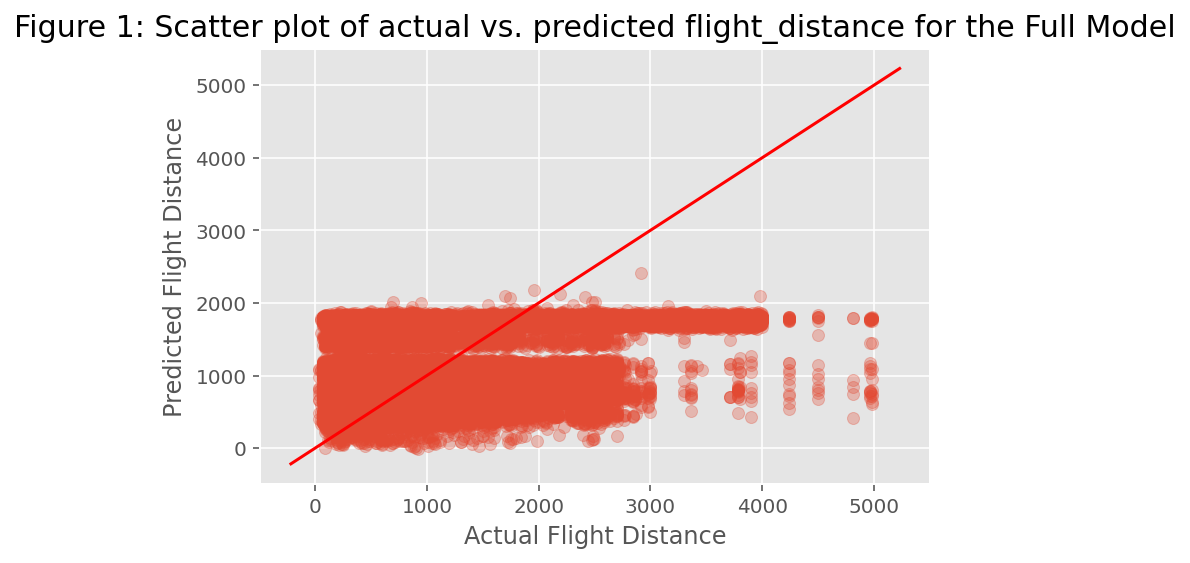

In [25]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Flight Distance');
plt.ylabel('Predicted Flight Distance');
plt.title('Figure 1: Scatter plot of actual vs. predicted flight_distance for the Full Model', fontsize=15);
plt.show();

As we can see from the figure 1, the model never produces a prediction over 3000 even though the longest distance in this figure is 5000.

Furthermore, we will check the diagnostics for the full model.

#### Full Model Diagnostic Checks

In this section, we would like to check whether there are indications of violations of the regression assumptions, which are
1. linearity of the relationship between target variable and the independent variables
2. constant variance of the errors
3. normality of the residual distribution
4. statistical independence of the residuals

Firstly, we need to get a scatter plot of residuals (as a function of predicted `flight_distance`).

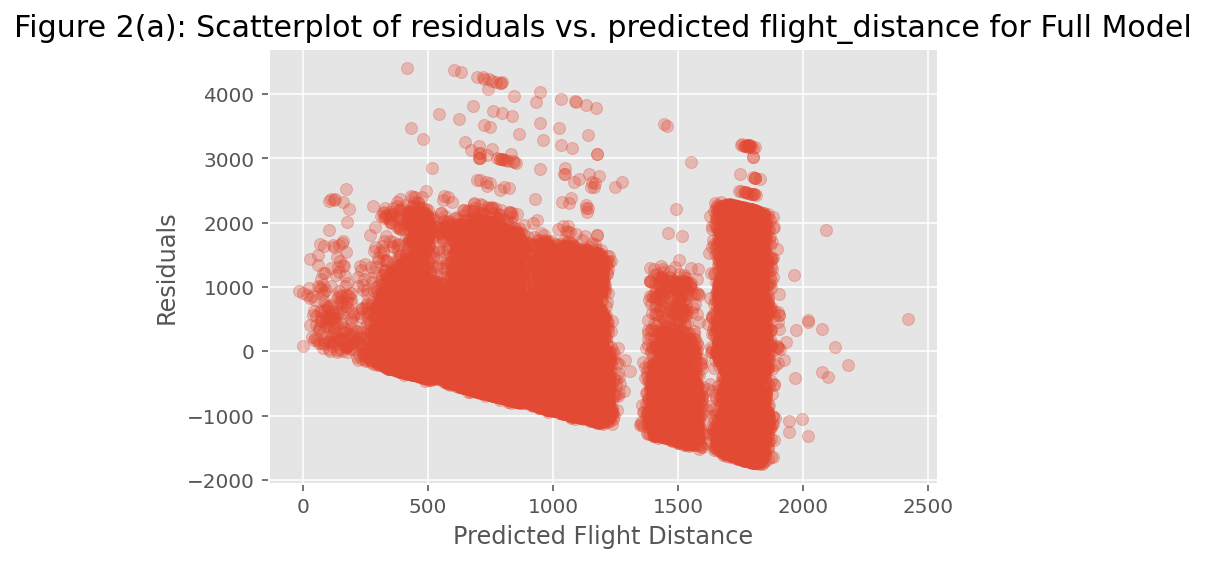

In [14]:
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Predicted Flight Distance');
plt.ylabel('Residuals')
plt.title('Figure 2(a): Scatterplot of residuals vs. predicted flight_distance for Full Model', fontsize=15)
plt.show();

#### Feature Selection

We use the code below to perform backward feature selection using p-values ([credit](https://github.com/vaksakalli/stats_tutorials/blob/master/Regression_Case_Study1_web.ipynb)).

In [15]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)

# initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=data_encoded).fit()
    
###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = data_encoded).fit()
###
    
#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "departure_delay_in_minutes:age" with p-value 0.9196


NameError: name 'data_encoded' is not defined

## Neural Network Model Fitting & Tuning <a id='Review'></a>

## Critique & Limitations <a id='cl'></a>

## Summary & Conclusions <a id='sc'></a>

### Project Summary <a id='sum'></a>

### Summary of Findings <a id='find'></a>

### Conclusions <a id='con'></a>